## WeRateDogs Data Wrangling project


## Table of Contents

- [Introduction](#intro)
- [Data Wrangling](#wrangling): Gathering and Assessing
    - [The First Dataset: twitter-archive-enhanced](#first)
    - [The Second Dataset: Image Predictions File](#second)
    - [The Third  Dataset: Data via the Twitter API](#third)
- [Cleaning](#cleaning)
- [Conclusion](#Conclusion)
- [Analyzing and Visualizing](#analyze)


<a id='intro'></a>
## Introduction

The tweet archive of WeRateDogs on Twitter is analyzed here. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog and it has over 4 million followers and has received international media coverage. Addithinal data such as retweet count and favorite count are obtained from Twitter's API. Predictions of breeds of dogs for each tweets are also provided.

<a id='wrangling'></a>
## Data Wrangling

In [177]:
#import the required libraries
import numpy as np
import pandas as pd
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [178]:
# use tweepy to query Twitter's API and hide the API info here
consumer_key = 'xxx'
consumer_secret = 'xxx'
access_token = 'xxx'
access_secret = 'xxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# set Twitter's rate limit
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

<a id='first'></a>
## The First Dataset (twitter-archive-enhanced)

<a id='wrangling'></a>
## Gathering

In [179]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [180]:
# expand column width to max
pd.set_option('display.max_colwidth', -1)

In [181]:
# View sapmle random rows of twitter-archive DataFrame
twitter_archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1210,715680795826982913,NaN,NaN,2016-03-31 23:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeus. He's downright fabulous. 12/10 https://t.co/sSugyyRuTp,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/715680795826982913/photo/1,https://twitter.com/dog_rates/status/715680795826982913/photo/1,https://twitter.com/dog_rates/status/715680795826982913/photo/1",12,10,Zeus,None,None,None,None
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9,10,None,None,None,None,None


## Assessing

### twitter_archive columns:

- **tweet_id**: the unique identifier for each tweet                   
- **in_reply_to_status_id**         
- **in_reply_to_user_id**:          
- **timestamp**: time of tweet                   
- **source**: Utility used to post the Tweet                      
- **text**: tweet's text                         
- **retweeted_status_id**:  retweet ID         
- **retweeted_status_user_id**: retweet ID user ID     
- **retweeted_status_timestamp**:   time of retweet    
- **expanded_urls**:  tweet urls               
- **rating_numerator**:  actual rating of a dog. Almost always is greater than 10. 11/10, 12/10, 13/10, etc, because ["they're good dogs Brent"](https://knowyourmeme.com/memes/theyre-good-dogs-brent)           
- **rating_denominator**:  These ratings always have a denominator of 10.           
- **name**: The name of the dog                        
- **doggo**, **floofer**, **pupper** & **puppo**:  dog stages                      


In [182]:
twitter_archive.shape

(2356, 17)

In [183]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [184]:
# Check if there are any doplicated tweet_ids
len(twitter_archive.tweet_id.unique())

2356

In [185]:
twitter_archive.groupby("name").size().sort_values(ascending=False)
 

name
None         745
a            55 
Charlie      12 
Oliver       11 
Lucy         11 
Cooper       11 
Lola         10 
Tucker       10 
Penny        10 
Bo           9  
Winston      9  
Sadie        8  
the          8  
an           7  
Toby         7  
Daisy        7  
Bailey       7  
Buddy        7  
Leo          6  
Scout        6  
Bella        6  
Dave         6  
Rusty        6  
Jack         6  
Jax          6  
Milo         6  
Koda         6  
Stanley      6  
Oscar        6  
very         5  
            ..  
Jiminus      1  
Jimbo        1  
Jim          1  
Jett         1  
Jessiga      1  
Jessifer     1  
Spencer      1  
Jersey       1  
Josep        1  
Juckson      1  
Kellogg      1  
Julio        1  
Sonny        1  
Keet         1  
Kayla        1  
Kawhi        1  
Katie        1  
Kathmandu    1  
Karma        1  
Karll        1  
Karl         1  
Kara         1  
Kanu         1  
Kane         1  
Kallie       1  
Kaiya        1  
Kaia         1  
Sora     

In [186]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [283]:
# Number of names started with small letter
twitter_archive.name.str.islower().sum()

109

In [188]:
twitter_archive.nunique()    

tweet_id                      2356
in_reply_to_status_id         77  
in_reply_to_user_id           31  
timestamp                     2356
source                        4   
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      25  
retweeted_status_timestamp    181 
expanded_urls                 2218
rating_numerator              40  
rating_denominator            18  
name                          957 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
dtype: int64

In [189]:
# View descriptive statistics of twitter-archive DataFrame
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [287]:
# total number of records with Null rating_numerator 
twitter_archive['rating_numerator'].isnull().sum() 

0

In [288]:
# Total number of records with zero rating_numerator
(twitter_archive['rating_numerator']== 0).sum()

2

In [289]:
twitter_archive['rating_numerator'].max()
# That will affect outlier

1776

In [290]:
(twitter_archive['rating_numerator']== 1776).sum()

1

In [291]:
# Show the information for the rating_numerator == 1776
twitter_archive.query("rating_numerator == 1776 ")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [292]:
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [293]:
# some extreme values such as 420, 1776 
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [197]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [294]:
# 10 is the standard rating_denominator, other numbers could be errors
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [295]:
twitter_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [296]:
twitter_archive.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [297]:
twitter_archive.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [298]:
twitter_archive.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [300]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

### Quality

- Erroneous Datatype: tweet_id, timestamp
- source column contains <> tag
- Denominator have differnt values, not only 10
- One record have so big nominator's value (1776) and also some other big values.
- Some expanded_urls contain more than one URL and some have missing value
- Invalid names
- rate checks
- There are retweets data
- Not needed columns:  in_reply_to_status_id  , in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp


### Tidiness
- **Dog Stages** (i.e doggo, floofer, pupper & puppo) should be one column

<a id='second'></a>
## The Second Dataset (Image Predictions File)

## Gathering

In [301]:
# Download Image Predictions File from Udacity's servers 
prediction = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [302]:
# check the request 
prediction.status_code

200

In [303]:
# save Predictions File
with open("image_predictions.tsv",mode="wb") as file:
    file.write(prediction.content)

In [304]:
# open the tsv file as a data frame
prediction=pd.read_csv("image_predictions.tsv",sep="\t")

In [318]:
#view random samples
prediction.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,Christmas_stocking,0.188397,False,studio_couch,0.086887,False,bookcase,0.082599,False
1167,735648611367784448,https://pbs.twimg.com/media/CjWMezdW0AErwU3.jpg,1,Pembroke,0.462594,True,seat_belt,0.261854,False,Cardigan,0.151698,True
1843,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,True,doormat,0.139994,False,dalmatian,0.132820,True
503,675878199931371520,https://pbs.twimg.com/media/CWEzo19WoAEiOCj.jpg,1,wood_rabbit,0.785756,False,hare,0.118181,False,Cardigan,0.043627,True
817,692894228850999298,https://pbs.twimg.com/media/CZ2nn7BUsAI2Pj3.jpg,1,German_short-haired_pointer,0.876977,True,bluetick,0.036615,True,basset,0.017848,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/676776408941662209/pu/img/k-6I3YEZAQtYPBXR.jpg,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
393,673583129559498752,https://pbs.twimg.com/media/CVkMRUeWsAA9bMh.jpg,1,Arctic_fox,0.153271,False,golden_retriever,0.113946,True,borzoi,0.110718,True
1620,802952499103731712,https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg,1,chow,0.944032,True,golden_retriever,0.017240,True,Pomeranian,0.012085,True
1856,841439858740625411,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg,3,military_uniform,0.853684,False,Labrador_retriever,0.048200,True,groenendael,0.015394,True


## Assessing

## column names - prediction

- tweet_id: ID for each tweet
- jpg_url: image url
- img_num: number of image in a tweet
- p1,p2,p3: prediction for the image in the tweet (no.1 prediction, no.2 prediction, no.3 prediction)
- p1_conf,p2_conf,p3_conf: how confident the prediction is for
- p1_dog,p2_dog,p3_dog:  whether or not the prediction is a breed of dog, i.e each prediction 
 each prediction 

In [306]:
prediction.shape

(2075, 12)

In [307]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [308]:
prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [319]:
# check the pictures whauch are not predicted as a dog 
prediction[prediction['p1_dog']== False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


> some pictures are not predicted as a dog at all as:
> - https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg	(a giraffe)
> - https://pbs.twimg.com/ext_tw_video_thumb/729838572744912896/pu/img/RIl-XYmRxW-YLFSV.jpg (A man)
> - https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg (Chicken)
> - https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg	 (Rabbit)
> - Some Dogs

In [310]:
prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Staffordshire_bullterrier    20 
German_shepherd              20 
Siberian_husky               20 
Cardigan                     19 
web_site                     19 
Shetland_sheepdog            18 
Eskimo_dog                   18 
beagle                       18 
teddy                        18 
Maltese_dog                  18 
Rottweiler                   17 
Lakeland_terrier             17 
Shih-Tzu                     17 
Italian_greyhound            16 
kuvasz                       16 
          

In [311]:
len(prediction[prediction['p1_dog']== False])

543

In [312]:
len(prediction[prediction['p2_dog']== False])

522

In [313]:
len(prediction[prediction['p3_dog']== False])

576

In [314]:
len(prediction[(prediction['p1_dog']== False) & (prediction['p2_dog']== False) & (prediction['p3_dog']== False)])

324

In [315]:
#Another way
prediction.query("p1_dog == False and p2_dog == False and p3_dog == False").count()[0]

324

In [316]:
len(prediction[prediction['p1_dog'] | prediction['p2_dog'] | prediction['p3_dog']])

1751

In [317]:
prediction.groupby("p1").size().sort_values(ascending=False)

p1
golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Siberian_husky               20 
Staffordshire_bullterrier    20 
German_shepherd              20 
Cardigan                     19 
web_site                     19 
Shetland_sheepdog            18 
Eskimo_dog                   18 
beagle                       18 
Maltese_dog                  18 
teddy                        18 
Lakeland_terrier             17 
Rottweiler                   17 
Shih-Tzu                     17 
kuvasz                       16 
Italian_greyhound            16 
       

### Quality

- Erroneous Datatype: tweet_id
- Some predictions have no dog image
- The dataset should only contain p, p_conf (take the highest prediction with dog spieces for each observation)

### Tidiness
- The dataset should be merged with twitter-archive datatset

<a id='third'></a>
## The Third  Dataset (Data via the Twitter API)

## Gathering

In [221]:
# write the querying JSON data into tweet_json.txt
#with open('tweet_json.txt','a',encoding = 'utf8') as f:
'''
for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended') # set mode to extended
            json.dump(tweet._json, f)
            f.write('\n')
        except: 
            print('error')
txt_file.close()
'''

"\nfor tweet_id in twitter_archive['tweet_id']:\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode = 'extended') # set mode to extended\n            json.dump(tweet._json, f)\n            f.write('\n')\n        except: \n            print('error')\ntxt_file.close()\n"

In [222]:
# As mentioned in Project Details:
# Each tweet's JSON data should be written to its own line. 
# Then read this .txt file line by line into a pandas DataFrame with (at minimum):
# tweet ID, retweet count, and favorite count

df_list = []
with open('tweet_json.txt', encoding ='utf-8') as file:
    for line in file:
        json_file = json.loads(line)
        tweet_id = json_file["id"]
        retweet_count = json_file["retweet_count"]
        favorite_count = json_file["favorite_count"]

        df_list.append({"tweet_id":tweet_id,
                        "retweet_count":retweet_count,
                       "favorite_count":favorite_count})
        
df_tweet_json = pd.DataFrame(df_list,columns=["tweet_id","retweet_count","favorite_count"])


## Assessing

In [223]:
df_tweet_json.sample(10)

,tweet_id,retweet_count,favorite_count
91,874296783580663808,4308,26651
1042,743609206067040256,1560,4917
2248,667832474953625600,68,303
1921,674082852460433408,186,804
55,881536004380872706,16570,50199
360,829501995190984704,12224,34913
1747,679047485189439488,781,2460
1010,747242308580548608,3257,0
1074,739606147276148736,1876,5897
2141,669970042633789440,65,317


In [224]:
# check info
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [225]:
df_tweet_json.shape

(2354, 3)

### Quality
- tweet_id data type from int to string

### Tidiness
- 3 data sets need to be merged

<a id='cleaning'></a>
# Cleaning

In [356]:
# make copies of the original datasets before cleaing
twitter_archive_clean = twitter_archive.copy()
prediction_clean = prediction.copy()
df_tweet_json_clean = df_tweet_json.copy()

## Quality

#### Define
- Change tweet_id Datatype from Integar to String in three datasets
- Change timestamp Datatype from Integar to date format from twitter_archive dataset

#### Code

In [357]:
# Change the data type of timestamp date from Integar to date format
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp']) 

In [358]:
# Change tweet_id Datatype from Intg to String
twitter_archive_clean['tweet_id'] = twitter_archive_clean.tweet_id.astype(str)
prediction_clean['tweet_id'] = prediction_clean.tweet_id.astype(str)
df_tweet_json_clean['tweet_id'] = df_tweet_json_clean .tweet_id.astype(str)

#### Test

In [359]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

In [360]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [361]:
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### Define
- Solve the NaN values in expanded_urls column from twitter_archive dataset

#### Code

In [362]:
# set url for concatenating
url_main ="https://twitter.com/dog_rates/status/"

In [363]:
# if expanded urls column is null then add the defined url + tweet id for url
twitter_archive_clean.loc[twitter_archive_clean.expanded_urls.isna(),"expanded_urls"]=url_main + twitter_archive_clean["tweet_id"].map(str)

#### Test

In [364]:
twitter_archive_clean['expanded_urls'].isnull().sum() 

0

#### Define
- Drop Not needed columns: in_reply_to_status_id  , in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp from twitter_archive dataset

#### Code

In [365]:
# Drop not needed columns
twitter_archive_clean.drop(['in_reply_to_status_id'  , 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)  

#### Test

In [366]:
twitter_archive_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1066,740699697422163968,2016-06-09 00:19:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chip. He only mowed half the yard. 8/10 quit the shit Chip we have other things to do https://t.co/LjzZKQ7vmK,https://twitter.com/dog_rates/status/740699697422163968/photo/1,8,10,Chip,None,None,None,None
1123,730427201120833536,2016-05-11 15:59:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Crystal. She's flawless. Really wants to be a frat bro. 11/10 who does she even know here? https://t.co/WyqNFvEulG,https://twitter.com/dog_rates/status/730427201120833536/photo/1,11,10,Crystal,None,None,None,None


#### Define
- Solve the Invalid dogs' names in twitter_archive dataset

#### Code

In [367]:
twitter_archive_clean['name'].value_counts().head(10)

None       745
a          55 
Charlie    12 
Cooper     11 
Oliver     11 
Lucy       11 
Penny      10 
Tucker     10 
Lola       10 
Bo         9  
Name: name, dtype: int64

In [368]:
# choose the most frequent incorrect dog name (a, an and the) and set them as None
incorrect_names = ['a','the','an']
for i in incorrect_names:
        twitter_archive_clean['name'].replace(i, 'None', inplace=True)

#### Test

In [369]:
twitter_archive_clean.groupby("name").size().sort_values(ascending=False).head(5)
 

name
None       815
Charlie    12 
Lucy       11 
Oliver     11 
Cooper     11 
dtype: int64

#### Define
- Capitalize the first letter of dog name for consistence.

#### Code

In [370]:
twitter_archive_clean['name'].str.islower().sum()

39

In [371]:
twitter_archive_clean['name'] = twitter_archive_clean.name.str.capitalize()

#### Test

In [372]:
twitter_archive_clean['name'].str.islower().sum()

0

#### Define
- Change the incorrect rating_numerator and rating_denominator values
- Create new column rating = rating_numerator/rating_denominator. 
- Drop rating_numerator and rating_denominator.
- Drop oberservations with extreme ratings.

#### Code

In [373]:
twitter_archive_clean.loc[twitter_archive_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [374]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.tweet_id!='810984652412424192']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]


twitter_archive_clean['rating']=twitter_archive_clean.rating_numerator/twitter_archive_clean.rating_denominator
twitter_archive_clean=twitter_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1)

twitter_archive_clean.loc[twitter_archive_clean.rating>2,['tweet_id','text','rating']]

,tweet_id,text,rating
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,42.0
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",66.6
290,838150277551247360,@markhoppus 182/10,18.2
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",inf
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.5
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.5
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.7
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.6
2074,670842764863651840,After so many requests... here you go.\r\n\r\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0


In [375]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='786709082849828864','rating']=1.0
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='778027034220126208','rating']=1.1
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='680494726643068929','rating']=1.1
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.rating<2]

### Test

In [376]:
twitter_archive_clean.rating.sort_values()


315     0.0
1016    0.0
2091    0.1
1869    0.1
2038    0.1
1940    0.1
2261    0.1
2338    0.1
1446    0.1
605     0.1
1920    0.2
2326    0.2
1761    0.2
2079    0.2
1764    0.2
2246    0.2
2310    0.2
2349    0.2
2237    0.2
1598    0.2
765     0.3
1249    0.3
1928    0.3
1938    0.3
1836    0.3
1898    0.3
2136    0.3
1947    0.3
1189    0.3
2305    0.3
       ... 
268     1.4
214     1.4
426     1.4
758     1.4
1605    1.4
436     1.4
56      1.4
64      1.4
68      1.4
657     1.4
76      1.4
78      1.4
83      1.4
631     1.4
141     1.4
589     1.4
95      1.4
110     1.4
533     1.4
1609    1.4
123     1.4
490     1.4
449     1.4
448     1.4
447     1.4
446     1.4
101     1.4
291     1.5
285     1.5
55      1.7
Name: rating, Length: 2348, dtype: float64

#### Define
There are prediction 1,2 and 3 in this data set with non-dog breeds. 
- Choose only a dog breed with the highest confidence each row. Tweets which are not predicted as a dog are set as missing value.

#### Code

In [377]:
# create new columns prediction and confidence
prediction_clean["prediction"] = prediction_clean["p1_dog"].map(str) + prediction_clean["p2_dog"].map(str) + prediction_clean["p3_dog"].map(str)
prediction_clean["confidence"] = np.nan
prediction_clean.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,confidence
1273,750026558547456000,https://pbs.twimg.com/media/CmieRQRXgAA8MV3.jpg,1,standard_poodle,0.258732,True,teddy,0.13076,False,toy_poodle,0.071726,True,TrueFalseTrue,NaN


In [378]:
# first prediction is true / confidence
prediction_clean.loc[prediction_clean.prediction == 'TrueTrueTrue', 'confidence'] = prediction_clean.p1_conf
prediction_clean.loc[prediction_clean.prediction == 'TrueFalseTrue', 'confidence'] = prediction_clean.p1_conf
prediction_clean.loc[prediction_clean.prediction == 'TrueTrueFalse', 'confidence'] = prediction_clean.p1_conf
prediction_clean.loc[prediction_clean.prediction == 'TrueFalseFalse', 'confidence'] = prediction_clean.p1_conf

# first prediction is true / prediction
prediction_clean.loc[prediction_clean.prediction == 'TrueTrueTrue', 'prediction'] = prediction_clean.p1
prediction_clean.loc[prediction_clean.prediction == 'TrueFalseTrue', 'prediction'] = prediction_clean.p1
prediction_clean.loc[prediction_clean.prediction == 'TrueTrueFalse', 'prediction'] = prediction_clean.p1
prediction_clean.loc[prediction_clean.prediction == 'TrueFalseFalse', 'prediction'] = prediction_clean.p1



# second prediction is true / confidence
prediction_clean.loc[prediction_clean.prediction == 'FalseTrueTrue', 'confidence'] = prediction_clean.p2_conf
prediction_clean.loc[prediction_clean.prediction == 'FalseTrueFalse', 'confidence'] = prediction_clean.p2_conf

# second prediction is true / prediction
prediction_clean.loc[prediction_clean.prediction == 'FalseTrueTrue', 'prediction'] = prediction_clean.p2
prediction_clean.loc[prediction_clean.prediction == 'FalseTrueFalse', 'prediction'] = prediction_clean.p2

# Third prediction is true / confidence
prediction_clean.loc[prediction_clean.prediction == 'FalseFalseTrue', 'confidence'] = prediction_clean.p3_conf

# Third prediction is True / prediction
prediction_clean.loc[prediction_clean.prediction == 'FalseFalseTrue', 'prediction'] = prediction_clean.p3


# no dog
prediction_clean.loc[prediction_clean.prediction == 'FalseFalseFalse', 'prediction'] = np.nan

In [379]:
# drop p1, p1_conf, p1_dog,p2, p2_conf, p2_dog,p3, p3_conf, p3_dog
prediction_clean.drop(columns=["p1","p1_conf","p1_dog","p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"],inplace=True,axis=1)

#### Test

In [380]:
# check randomly
prediction_clean.sample(10)

,tweet_id,jpg_url,img_num,prediction,confidence
1249,747844099428986880,https://pbs.twimg.com/media/CmDgPTsWEAIi2T1.jpg,1,Pembroke,0.360428
355,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945
1706,817536400337801217,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,2,pug,0.971358
499,675822767435051008,https://pbs.twimg.com/media/CWEBOFYWwAA-O2c.jpg,1,Pomeranian,0.460710
897,699775878809702401,https://pbs.twimg.com/media/CbYac83W4AAUH1O.jpg,1,Dandie_Dinmont,0.271683
704,684926975086034944,https://pbs.twimg.com/media/CYFZXdiU0AAc_kw.jpg,1,Labrador_retriever,0.769412
494,675710890956750848,https://pbs.twimg.com/media/CWCbd8ZWoAAtqoH.jpg,2,standard_schnauzer,0.441427
1018,710117014656950272,https://pbs.twimg.com/media/CdrXp9dWoAAcRfn.jpg,2,toy_poodle,0.802092
78,667443425659232256,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,NaN,NaN
1513,786595970293370880,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,1,Pembroke,0.709512


#### Define
- Remove observations which are predicted as non-dog.

#### Code

In [381]:
# drop rows if prediction is nan
prediction_clean=prediction_clean.dropna(subset=["prediction"])

#### Test

In [382]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id      1751 non-null object
jpg_url       1751 non-null object
img_num       1751 non-null int64
prediction    1751 non-null object
confidence    1751 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 82.1+ KB


#### Define
- Change prediction data type to be categorical

#### Code

In [383]:
prediction_clean.prediction = prediction_clean.prediction.astype('category')

#### Test

In [384]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id      1751 non-null object
jpg_url       1751 non-null object
img_num       1751 non-null int64
prediction    1751 non-null category
confidence    1751 non-null float64
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 76.0+ KB


### Tidiness

#### Define
Compain Dog stages columns (i.e doggo, floofer, pupper & puppo) so that it has only one column for a dog stage

#### Code

In [385]:
# replace None with nan
twitter_archive_clean.replace("None",np.nan,inplace=True)

In [386]:
# replace nan with an empty space to concatnate strings
twitter_archive_clean[["doggo","floofer","pupper","puppo"]]=twitter_archive_clean[["doggo","floofer","pupper","puppo"]].fillna("")

In [387]:
# check the result
twitter_archive_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
139,865359393868664832,2017-05-19 00:12:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sammy. Her tongue ejects without warning sometimes. It's a serious condition. Needs a hefty dose from a BlepiPen. 13/10 https://t.co/g20EmqK7vc,"https://twitter.com/dog_rates/status/865359393868664832/photo/1,https://twitter.com/dog_rates/status/865359393868664832/photo/1",Sammy,,,,,1.3


In [388]:
# concatnate dog stage columns to create a new column "stage"
twitter_archive_clean["stage"]=(twitter_archive_clean["doggo"] + twitter_archive_clean["floofer"] + twitter_archive_clean["pupper"] + twitter_archive_clean["puppo"])

In [389]:
# check unique stages
twitter_archive_clean.stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

**There are tweets with multiple dog stages. It needs to be solved.**

In [390]:
# Handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

# Handle missing values through change empty stages to na
twitter_archive_clean.loc[twitter_archive_clean.stage == '', 'stage'] = np.nan

In [391]:
# check the result
twitter_archive_clean[twitter_archive_clean["stage"].notna()].stage.unique()

array(['doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [392]:
# drop "doggo","floofer","pupper","puppo" columns
twitter_archive_clean.drop(columns=["doggo","floofer","pupper","puppo"],axis=1,inplace=True)

In [393]:
# reset index
twitter_archive_clean.reset_index(inplace=True,drop=True)

## Test

In [394]:
# check number of observations
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 8 columns):
tweet_id         2348 non-null object
timestamp        2348 non-null datetime64[ns, UTC]
source           2348 non-null object
text             2348 non-null object
expanded_urls    2348 non-null object
name             1538 non-null object
rating           2348 non-null float64
stage            380 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 146.8+ KB


In [395]:
# check data structure
twitter_archive_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage
916,756275833623502848,2016-07-21 23:53:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When ur older siblings get to play in the deep end but dad says ur not old enough. Maybe one day puppo. All 10/10 https://t.co/JrDAzMhwG9,"https://twitter.com/dog_rates/status/756275833623502848/photo/1,https://twitter.com/dog_rates/status/756275833623502848/photo/1",NaN,1.0,puppo
256,843604394117681152,2017-03-19 23:25:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hank. He's been outside for 3 minutes and already made a friend. Way to go Hank. 11/10 for both https://t.co/wHUElL84RC,https://twitter.com/dog_rates/status/843604394117681152/photo/1,Hank,1.1,NaN


In [396]:
# make pick up checks with the original data
twitter_archive_clean[twitter_archive_clean.tweet_id ==881536004380872706].stage

Series([], Name: stage, dtype: object)

In [397]:
twitter_archive[twitter_archive.tweet_id ==881536004380872706].pupper

56    pupper
Name: pupper, dtype: object

#### Define 
Optimize the source content by ‘Twitter for iphone’, ‘Vine - Make a Scene’, ‘Twitter Web Client’, and ‘TweetDeck’.

#### Code

In [398]:
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2214
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    10  
Name: source, dtype: int64

In [399]:
# simpfy the source contexts       
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

# change the type of source to category 
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

### Test

In [400]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2214
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              10  
Name: source, dtype: int64

#### Define
Merge the three data sets

#### Code

In [401]:
# Merge the three DataFrames into one master DataFrame, starting first with archive_clean and json_clean
temp = pd.merge(twitter_archive_clean, df_tweet_json_clean, on=['tweet_id','tweet_id'],how='left') 

In [402]:
# Check merge went as anticipated
temp.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,retweet_count,favorite_count
1378,700747788515020802,2016-02-19 18:24:26+00:00,Twitter for iPhone,We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://t.co/22x9SbCYCU,https://twitter.com/dog_rates/status/700747788515020802/photo/1,Very,1.1,NaN,10673.0,25130.0
1886,674752233200820224,2015-12-10 00:47:23+00:00,Twitter for iPhone,Everyone please just appreciate how perfect these two photos are. 12/10 for both https://t.co/rLf7asnHxO,"https://twitter.com/dog_rates/status/674752233200820224/photo/1,https://twitter.com/dog_rates/status/674752233200820224/photo/1",NaN,1.2,NaN,516.0,1580.0


In [403]:
# Merge new master with image_clean
twitter_archive_clean = pd.merge(temp, prediction_clean, on='tweet_id',how='left') 

#### Test

In [404]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 0 to 2347
Data columns (total 14 columns):
tweet_id          2348 non-null object
timestamp         2348 non-null datetime64[ns, UTC]
source            2348 non-null category
text              2348 non-null object
expanded_urls     2348 non-null object
name              1538 non-null object
rating            2348 non-null float64
stage             380 non-null object
retweet_count     2346 non-null float64
favorite_count    2346 non-null float64
jpg_url           1750 non-null object
img_num           1750 non-null float64
prediction        1750 non-null category
confidence        1750 non-null float64
dtypes: category(2), datetime64[ns, UTC](1), float64(5), object(6)
memory usage: 249.1+ KB


In [406]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,retweet_count,favorite_count,jpg_url,img_num,prediction,confidence
1188,717421804990701568,2016-04-05 18:41:02+00:00,Twitter for iPhone,This is Ebby. She's a Zimbabwean Feta. Embarrassed by ridiculously squishy face. 9/10 would squeeze softly https://t.co/LBJqxMGaHi,"https://twitter.com/dog_rates/status/717421804990701568/photo/1,https://twitter.com/dog_rates/status/717421804990701568/photo/1",Ebby,0.9,NaN,945.0,3446.0,https://pbs.twimg.com/media/CfTLUYWXEAEkyES.jpg,2.0,miniature_pinscher,0.286479
141,864873206498414592,2017-05-17 16:00:15+00:00,Twitter for iPhone,We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR,"https://twitter.com/dog_rates/status/864873206498414592/photo/1,https://twitter.com/dog_rates/status/864873206498414592/photo/1",NaN,1.4,NaN,9361.0,33651.0,NaN,NaN,NaN,NaN
1074,738885046782832640,2016-06-04 00:08:17+00:00,Twitter for iPhone,This is Charles. He's a Nova Scotian Towel Pouncer. Deadly af. Nifty tongue slip. 11/10 would pet with caution https://t.co/EfejX3iRGr,https://twitter.com/dog_rates/status/738885046782832640/photo/1,Charles,1.1,NaN,1283.0,4127.0,https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg,1.0,American_Staffordshire_terrier,0.015535


In [407]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')

<a id='analyze'></a>
# Analyze and Visualize

In [408]:
twitter_archive_clean.describe()

,rating,retweet_count,favorite_count,img_num,confidence
count,2348.000000,2346.000000,2346.000000,1750.000000,1750.000000
mean,1.070486,3168.190537,8096.464194,1.214857,0.548807
std,0.218110,5291.737178,11830.878221,0.574478,0.298789
min,0.000000,0.000000,0.000000,1.000000,0.000010
25%,1.000000,626.250000,1415.000000,1.000000,0.302892
50%,1.100000,1473.500000,3603.500000,1.000000,0.548901
75%,1.200000,3652.000000,10169.750000,1.000000,0.819996
max,1.700000,79515.000000,132810.000000,4.000000,0.999956


In [409]:
values=np.sort(twitter_archive_clean.rating.unique())

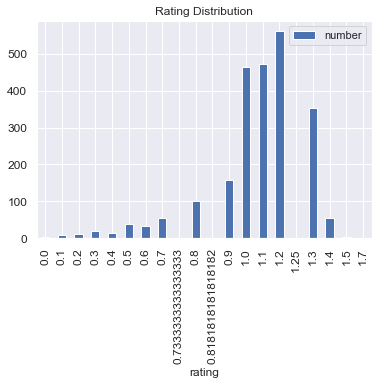

In [430]:
rating_analyze=pd.DataFrame(columns=['rating','number'])
rating_analyze['rating']= values
for x in rating_analyze['rating']:
    df=twitter_archive_clean[twitter_archive_clean.rating==x]
    rating_analyze.loc[rating_analyze.rating==x,'number']=df['tweet_id'].count()
rating_analyze[['rating','number']].plot(x='rating',kind='bar', title='Rating Distribution', fontsize=12)
plt.savefig('rating-distribution.png');

Twitter for iPhone     2214
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              10  
Name: source, dtype: int64


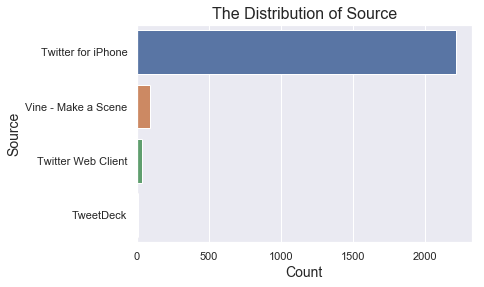

In [427]:
sorted_source = twitter_archive_clean['source'].value_counts().index
print(twitter_archive_clean['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_clean, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16)
plt.savefig('The-distribution-of-ource.png');

>This plot shows that the dominate source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDesk is pretty rare (less than 1%).

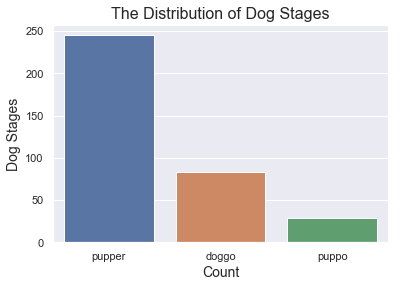

In [426]:
sorted_stage = twitter_archive_clean['stage'].value_counts().head(3).index
sns.countplot(data = twitter_archive_clean, x = 'stage', order = sorted_stage, orient = 'h')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16)
plt.savefig('top-distribution-dog-stages.png');

>It shows that ‘pupper’ (a small doggo, usually younger) is the most popular dog stage, followed by ‘doggo’ and ‘puppo’. It could be due to the young and unmatured dog is usually cuter than the adult dog. It should also be noticed that there’s huge amount missing data in dog stages, thus the distribution may not reflect the truth.

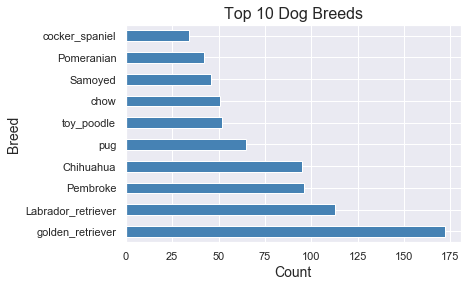

In [424]:
top_breeds = twitter_archive_clean.prediction.value_counts()[0:10].sort_values(axis=0, ascending=False)
top_breeds.plot(kind = 'barh', color=['steelblue'])
plt.title('Top 10 Dog Breeds', size=16)
plt.xlabel('Count', size=14)
plt.ylabel('Breed', size=14)
plt.savefig('top-breeds.png');

>There are more golden Retrievers than any other dog in the dataset. Labrador Retrievers are the second most
common.


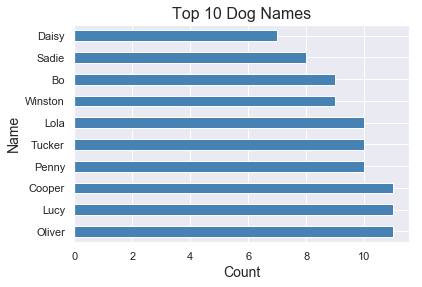

In [418]:
top_names = twitter_archive_clean.name.value_counts()[1:11].sort_values(axis=0, ascending=False)
top_names.plot(kind = 'barh', color='steelblue')
plt.title('Top 10 Dog Names', size=16)
plt.xlabel('Count', size=14)
plt.ylabel('Name', size=14)
plt.savefig('top-names.png');

>Oliver, Lucy and Cooper are the most popular dog names.

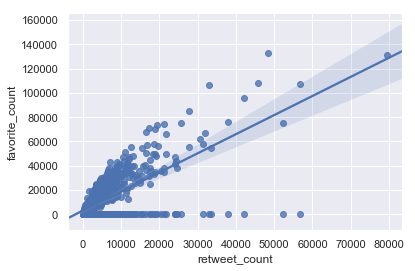

In [425]:
sns.regplot(x="retweet_count", y="favorite_count", data=twitter_archive_clean)
plt.savefig('retweet&favorite_count.png');

> There is a strong positive correlation between number of retweets and favorite count. That is reasonable, the more a post is retweeted, the more eyes view the post, the more favorites the post receives

### Insights¶
- The mean for rating is 1.055;the 3 most common ratings are 1.2,1.0,1.1, and rating frequency becomes smaller as the rating becomes extreme.
- Posts with extreme ratings get more favorites and retweets.Posts with rating 1.4 gets the highest favorite counts and retweet counts.
- Among the 4 dog stages, pupper has the biggest frequency, but pupper also gets the lowest favorite counts and retweet counts and rating.

<a id='conclusion'></a>
# Conclusion

- Most frequentry tweeted dog breeds are Golden retriever and Labrador retriever according to the image prediction.
- Even though a number of tweet declines over time, retweets - and favorite counts increase which shows more user interactions.

Change the rating_numerator and rating_denominator for oberservations with wrong value
Oberservations with tweet_id '810984652412424192'doesn't have a valid rating, so drop this row.
Create new column rating=rating_numerator/rating_denominator. Drop rating_numerator and rating_denominator.
Drop oberservations with extreme ratings.